In [2]:
import os
import numpy as np
import cv2
import json
from pathlib import Path
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torchvision.utils import make_grid
import pickle

In [91]:
from matplotlib.pyplot import imshow, figure
import matplotlib as mpl

def view_image(ii, dpi=100, nrow=4):
    mpl.rcParams['figure.dpi'] = dpi
    if len(ii.shape) == 3:        
        imshow(ii)
        return
    t = torch.from_numpy(ii)
    t = t.permute(0, 3, 1, 2)
    n = make_grid(t,padding=4,pad_value=1, nrow=nrow)
    imshow(n.numpy().transpose(1,2,0))

def img_and_mask(data, center=True):
    img = data['image']
    mask = data['mask']
    ann = data['objects']
    imgs = np.stack([img,mask])
    ii = imgs.copy()
    if center:
        for a in ann:
            x = a['pixel_coords'][0]
            y = a['pixel_coords'][1]
            for i in ii:
                i = cv2.circle(i, (x, y), 2, (1,0,0), 4)
    return ii
    
def view_img_and_mask(data, center=True, dpi=100,nrow=2):
    imgs = img_and_mask(data, center)
    view_image(imgs, dpi, nrow)
        
def view_all(data, center=True, dpi=100, nrow=2):
    imgs = []
    topview = img_and_mask(data['topview'],center)
    imgs.append(topview)
    for d in data['views']:
        imgs.append(img_and_mask(d, center))
    imgs = np.concatenate(imgs)
    view_image(imgs, dpi,nrow)
    
    
    

rootpath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/output')


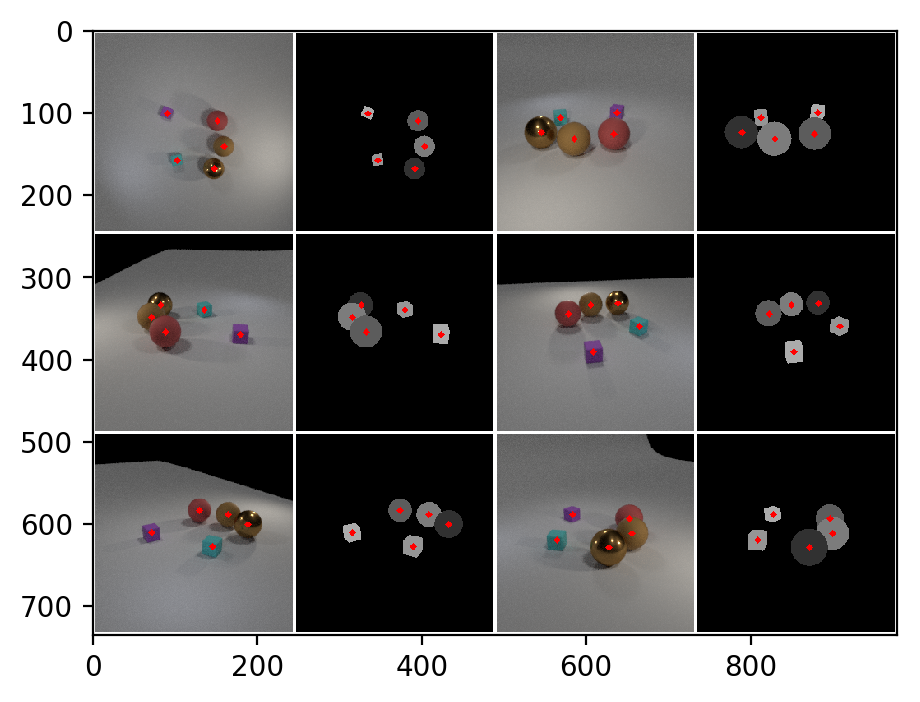

In [92]:
idx = 0
datapath = rootpath / '{}.pkl'.format(idx)
with open(datapath, 'rb') as f:
    scene = pickle.load(f)

topview = scene['topview']
view_all(scene,dpi=200,nrow=4)

In [62]:
for o in ann['objects']:
    print(o['shape'], o['pixel_coords'])
print(np.array(ann['colormap']))
mask = np.stack([imgs[1]] * len(ann['objects'])) # 64 is the background color
#cnt = dict.(zip(*np.unique(mask[0], return_counts=True)))
#del cnt[0]
#print(cnt)

for i, k in enumerate(ann['colormap']):
    # mask[i, mask[i] != k] = 0
    mask[i, mask[i] == k] = 0
view_image(mask,200)

TypeError: list indices must be integers or slices, not str

In [10]:
# Note that the procedures below assumes that imgs are already sorted by z depth
# Closer object gets lower index

# Create binary masking of each objects.
subs = imgs.copy()[1:]
n = subs.shape[0]
subs = np.vstack(subs)
subs = cv2.cvtColor(subs, cv2.COLOR_BGR2GRAY)
subs = subs.reshape(n, 240, 240)
subs = subs - np.stack([subs[0]] * n)
mask = subs > 200
subs[mask] = 0
idx = np.where(np.logical_and(subs > 100, subs< 200))
subs[idx] = 255

# Occlusion by objects in front
masks = subs.copy().astype(np.int16)
for i in range(masks.shape[0]-1):
    masks[i+1] -= np.abs(masks[i])
masks = masks.astype(np.uint8)[1:]
view_gray(masks,100)


ZeroDivisionError: float division by zero

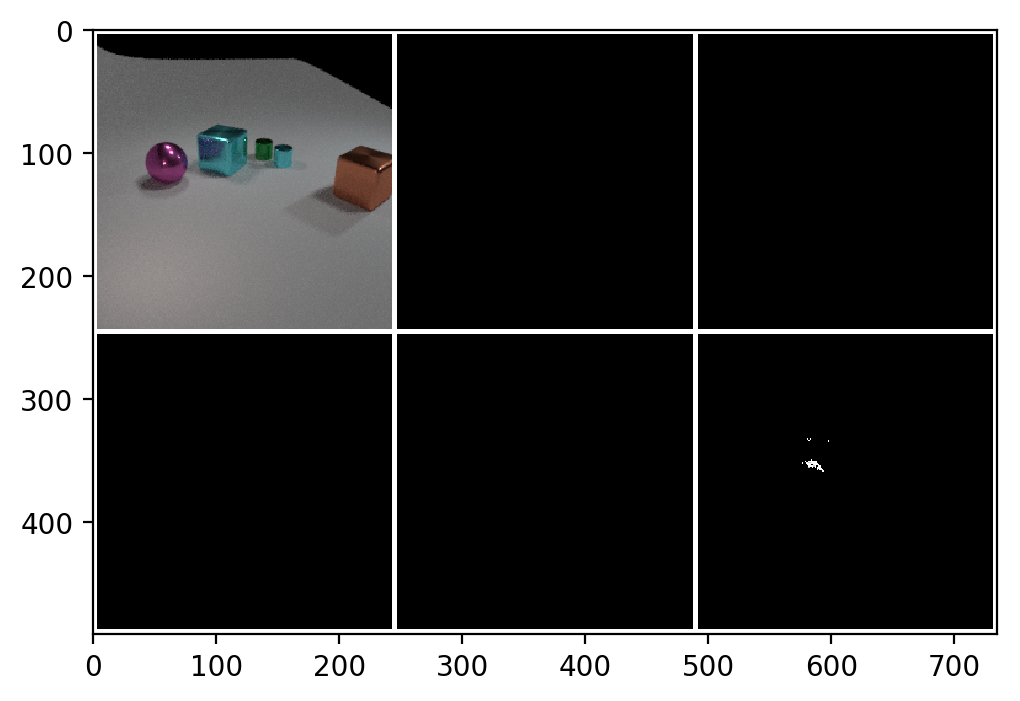

In [71]:
rgb_mask = np.stack([masks] * 3, -1)
full = np.concatenate([np.expand_dims(imgs[0],0), rgb_mask])
view_image(full,200,nrow=3)

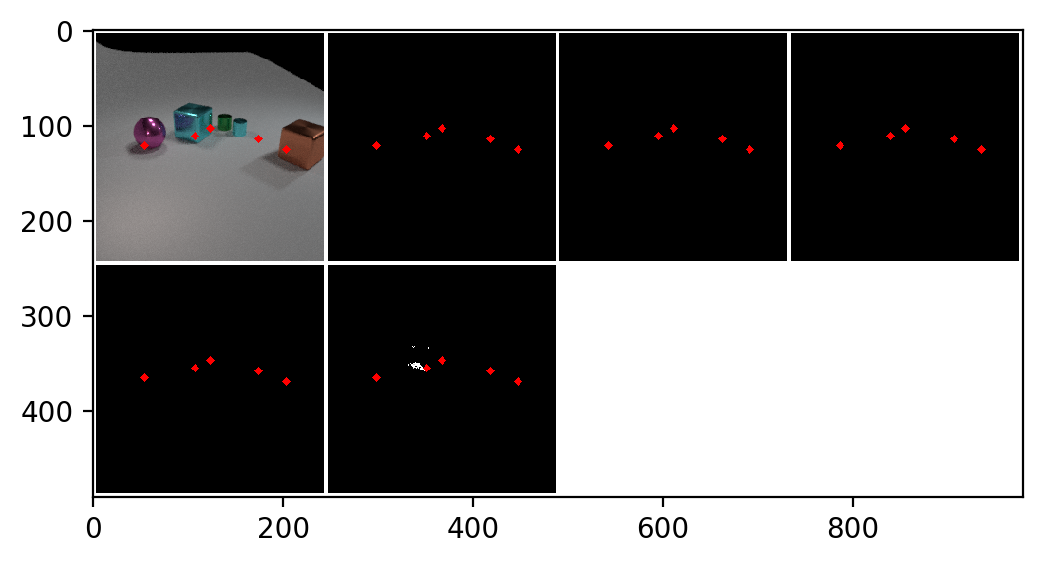

In [100]:
# Object center locations
ii = full.copy()
for a in ann['objects']:
    x = a['pixel_coords'][0]
    y = a['pixel_coords'][1]
    for i in ii:
        i = cv2.circle(i, (x, y), 2, (255,0,0), 4)
    #pts = np.array(a['pixel_bbox'])[:,:2].astype(int)
    #tl = (np.min(pts[:,0]), np.min(pts[:,1]))
    #br = (np.max(pts[:,0]), np.max(pts[:,1]))
    #ii = cv2.rectangle(ii, tl, br, (255,0,0), 1)

view_image(ii,200)

In [99]:
for a in ann['objects']:
    print(a['shape'], a['pixel_coords'])

sphere [200, 122, 10.372808456420898]
cube [171, 111, 11.209991455078125]
cylinder [104, 108, 10.682252883911133]
cube [120, 100, 12.270238876342773]
cylinder [51, 118, 10.640951156616211]


In [28]:
datapath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/')
idx = 0
annpath = datapath / '{}.json'.format(idx)

with open(annpath, 'r') as f:
    ann = json.load(f)

In [29]:
ann['objects'][0]['pixel_coords']

[123, 158, 8.280657768249512]

In [30]:
datapath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/')
idx = 1
annpath = datapath / '{}.json'.format(idx)

with open(annpath, 'r') as f:
    ann = json.load(f)

In [31]:
ann['objects'][0]['pixel_coords']

[123, 158, 8.280657768249512]

In [5]:
import pickle

In [50]:
datapath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/output/0.pkl')

with open(datapath, 'rb') as f:
    scene = pickle.load(f)
    
print(scene.keys())

dict_keys(['topview', 'views', 'world'])


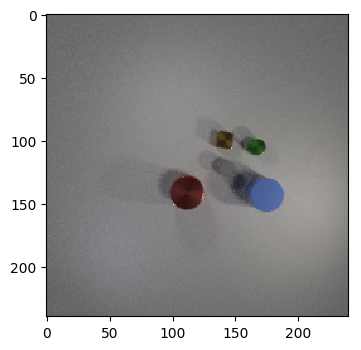

In [51]:
scene['topview']['image'].shape
img = scene['topview']['image']
mask = scene['topview']['mask']
first = scene['views'][0]['image']
first_mask = scene['views'][0]['mask']
first_ann = scene['views'][0]['objects']
ann = scene['topview']['objects']
view_image(scene['topview']['image'])

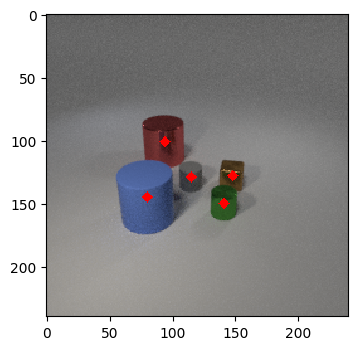

In [52]:
view_image(first)
ii = first.copy()
for a in first_ann:
    x = a['pixel_coords'][0]
    y = a['pixel_coords'][1]
    ii = cv2.circle(ii, (x, y), 2, (1,0,0), 4)
view_image(ii)

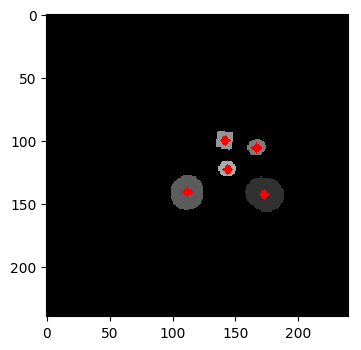

In [53]:
ii = mask.copy()
for a in ann:
    x = a['pixel_coords'][0]
    y = a['pixel_coords'][1]
    ii = cv2.circle(ii, (x, y), 2, (1,0,0), 4)
view_image(ii)


In [27]:
for a in ann:
    print(a['color'], a['pixel_coords'], a['shape'])

gray (96, 98, 14.300000190734863) cube
cyan (73, 108, 14.649999618530273) cube
blue (128, 104, 14.300000190734863) cube
gray (100, 153, 14.300000190734863) cube
gray (137, 153, 14.649999618530273) cylinder


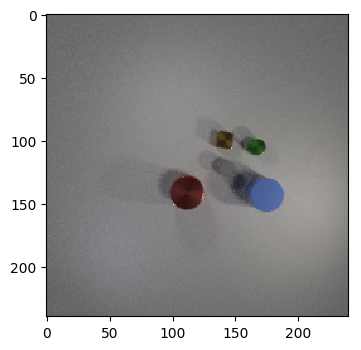

In [54]:
view_image(img)

In [41]:
64/255

0.25098039215686274